In [24]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import ast
from pathlib import Path

# Load CSV
csv_path = Path('../synthetic_plates_test_3/synthetic_plates.csv')
df = pd.read_csv(csv_path)

print(f"Loaded {len(df)} samples")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst sample:")
print(df.iloc[0])

Loaded 5 samples

Columns: ['plate', 'province_code', 'province_description', 'image_name_gray', 'plate_bbox', 'character_bbox']

First sample:
plate                                                      ไว้ 5617
province_code                                                 TH-77
province_description                                    อุบลราชธานี
image_name_gray                         images/synthetic_000000.jpg
plate_bbox                 [[97.99999999999999, 30.0, 242.0, 81.0]]
character_bbox          [[123.0, 104.0, 216.99999999999997, 130.0]]
Name: 0, dtype: object


In [25]:
def draw_bounding_boxes(image_path, plate_bbox_str, character_bbox_str, plate_text, province_text):
    """
    Draw bounding boxes on image
    """
    # Read image
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Error: Could not read image {image_path}")
        return None
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width = img.shape[:2]
    
    # Parse bounding boxes
    plate_bbox = ast.literal_eval(plate_bbox_str)[0]  # [[x_min, y_min, x_max, y_max]]
    character_bbox = ast.literal_eval(character_bbox_str)[0]
    
    # Draw plate bounding box (blue)
    x_min, y_min, x_max, y_max = [int(coord) for coord in plate_bbox]
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
    cv2.putText(img, f"Plate: {plate_text}", (x_min, y_min - 5), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    
    # Draw character/province bounding box (green)
    x_min, y_min, x_max, y_max = [int(coord) for coord in character_bbox]
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.putText(img, f"Province: {province_text}", (x_min, y_max + 15), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    return img

C:\Users\PC\AppData\Local\Temp\ipykernel_37488\2419999340.py:28: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_37488\2419999340.py:28: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_37488\2419999340.py:28: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_37488\2419999340.py:28: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_37488\2419999340.py:28: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_37488\2419999340.py:28: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing f

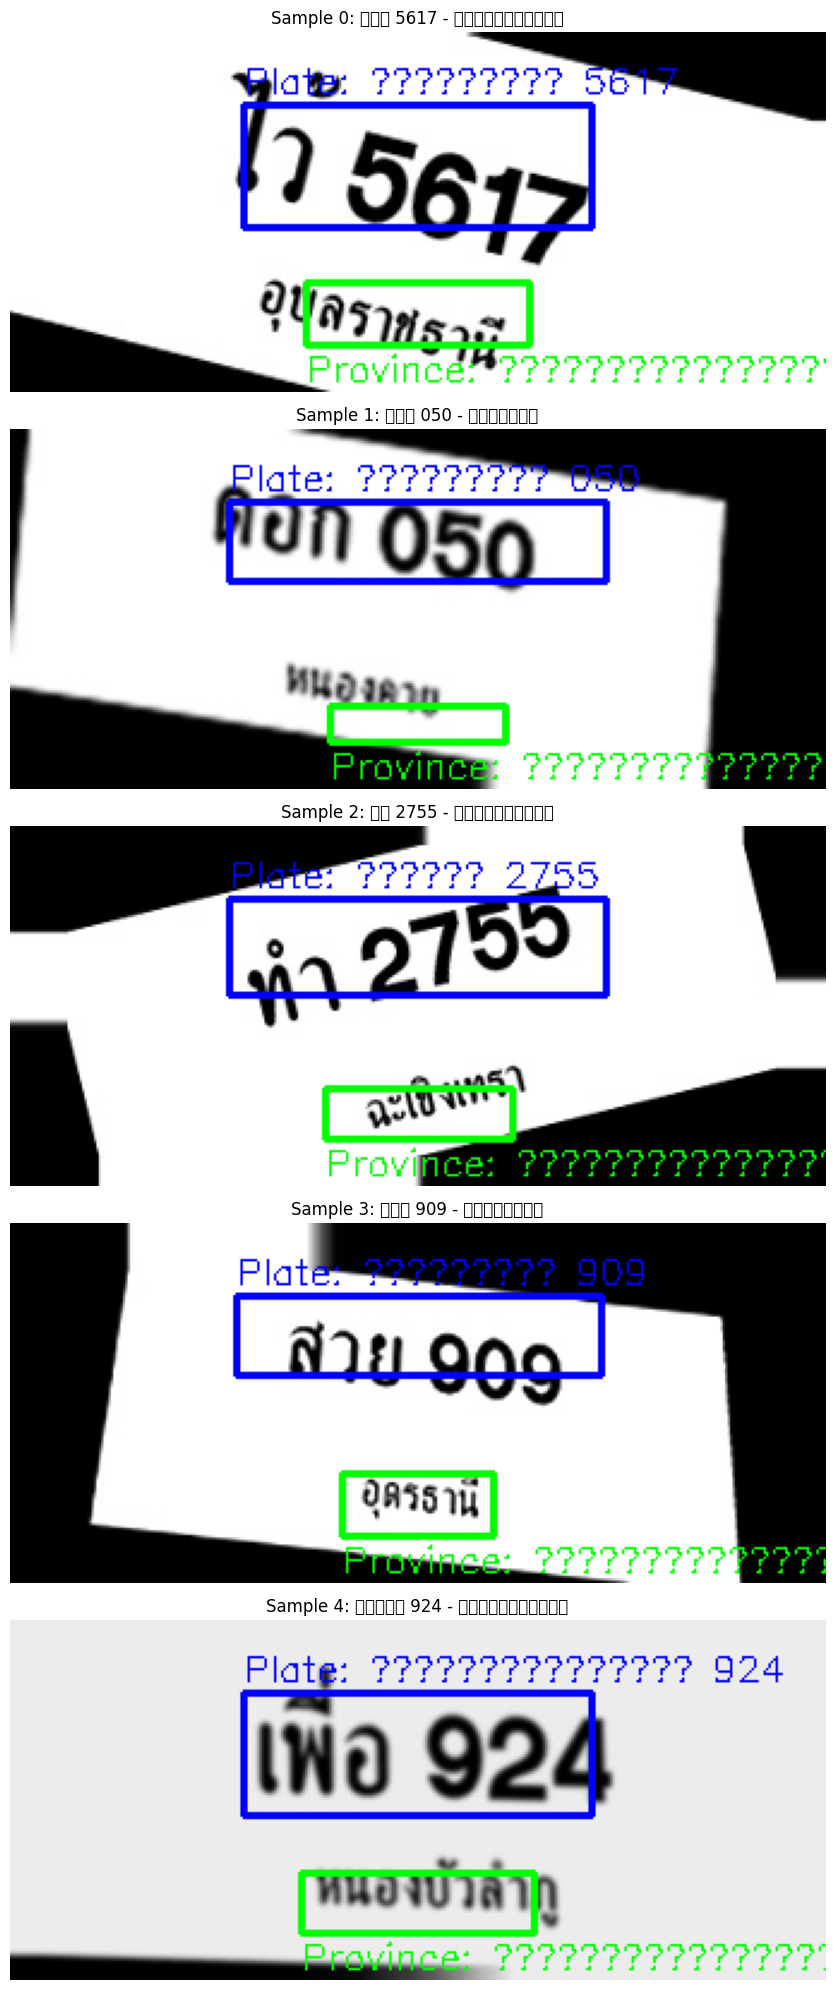

In [26]:
# Visualize first 5 samples
num_samples = min(5, len(df))
fig, axes = plt.subplots(num_samples, 1, figsize=(10, 4 * num_samples))

if num_samples == 1:
    axes = [axes]

for idx in range(num_samples):
    row = df.iloc[idx]
    
    # Build full image path
    image_path = Path('../synthetic_plates_test_3') / row['image_name_gray']
    
    # Draw bounding boxes
    img_with_boxes = draw_bounding_boxes(
        image_path,
        row['plate_bbox'],
        row['character_bbox'],
        row['plate'],
        row['province_description']
    )
    
    if img_with_boxes is not None:
        axes[idx].imshow(img_with_boxes)
        axes[idx].set_title(f"Sample {idx}: {row['plate']} - {row['province_description']}")
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Check bounding box statistics
print("Bounding Box Statistics:")
print("=" * 50)

for idx in range(min(3, len(df))):
    row = df.iloc[idx]
    
    plate_bbox = ast.literal_eval(row['plate_bbox'])[0]
    character_bbox = ast.literal_eval(row['character_bbox'])[0]
    
    print(f"\nSample {idx}: {row['plate']} - {row['province_description']}")
    print(f"  Plate bbox: {[int(x) for x in plate_bbox]}")
    print(f"  Province bbox: {[int(x) for x in character_bbox]}")
    print(f"  Plate width: {int(plate_bbox[2] - plate_bbox[0])} px")
    print(f"  Plate height: {int(plate_bbox[3] - plate_bbox[1])} px")
    print(f"  Province width: {int(character_bbox[2] - character_bbox[0])} px")
    print(f"  Province height: {int(character_bbox[3] - character_bbox[1])} px")

Bounding Box Statistics:

Sample 0: ไว้ 5617 - อุบลราชธานี
  Plate bbox: [97, 30, 242, 81]
  Province bbox: [123, 104, 216, 130]
  Plate width: 144 px
  Plate height: 51 px
  Province width: 93 px
  Province height: 26 px

Sample 1: ดอก 050 - หนองคาย
  Plate bbox: [91, 30, 248, 63]
  Province bbox: [133, 115, 206, 130]
  Plate width: 157 px
  Plate height: 33 px
  Province width: 73 px
  Province height: 14 px

Sample 2: ทำ 2755 - ฉะเชิงเทรา
  Plate bbox: [91, 30, 248, 70]
  Province bbox: [131, 109, 209, 130]
  Plate width: 157 px
  Plate height: 40 px
  Province width: 78 px
  Province height: 21 px


## Interactive Viewer
Select sample index to view

In [28]:
from ipywidgets import interact, IntSlider

def view_sample(sample_idx):
    if sample_idx >= len(df):
        print(f"Sample {sample_idx} does not exist")
        return
    
    row = df.iloc[sample_idx]
    image_path = Path('../synthetic_plates_test_3') / row['image_name_gray']
    
    img_with_boxes = draw_bounding_boxes(
        image_path,
        row['plate_bbox'],
        row['character_bbox'],
        row['plate'],
        row['province_description']
    )
    
    if img_with_boxes is not None:
        plt.figure(figsize=(10, 4))
        plt.imshow(img_with_boxes)
        plt.title(f"Sample {sample_idx}: {row['plate']} - {row['province_description']}")
        plt.axis('off')
        plt.show()
        
        print(f"\nDetails:")
        print(f"  Plate: {row['plate']}")
        print(f"  Province Code: {row['province_code']}")
        print(f"  Province: {row['province_description']}")
        print(f"  Plate bbox: {row['plate_bbox']}")
        print(f"  Province bbox: {row['character_bbox']}")

# Interactive widget
interact(view_sample, sample_idx=IntSlider(min=0, max=len(df)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='sample_idx', max=4), Output()), _dom_classes=('widget-in…